In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
len(data)

150

In [7]:
data.shape

(150, 5)

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is sepal_length
Column number 2 is sepal_width
Column number 3 is petal_length
Column number 4 is petal_width
Column number 5 is species


In [10]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [14]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
data.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [19]:
target_data = data.iloc[:,4]
target_data.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [20]:
clustering_data =data.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


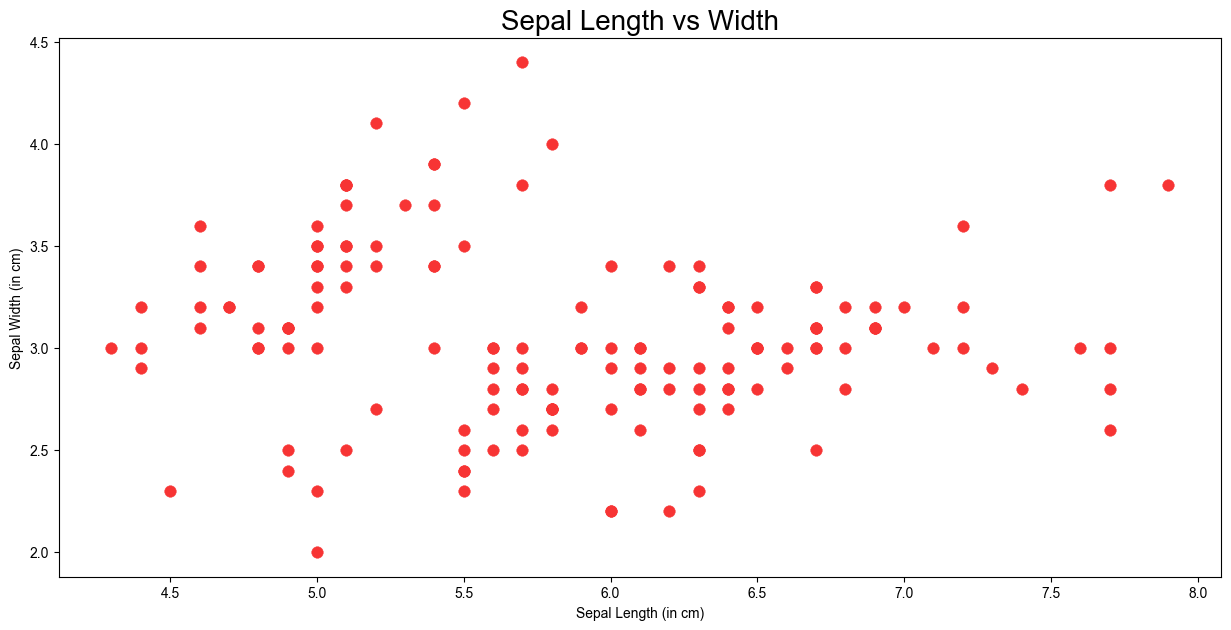

In [21]:
ax =plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['sepal_length'],y=data['sepal_width'], s=70, color='#f73434',edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize =20) 
plt.show()

In [22]:
from sklearn.cluster import KMeans 
wcss=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i)  # Specify the number of clusters
    km.fit(clustering_data)    # Fit the model to your data
    wcss.append(km.inertia_)
wcss_array = np.array(wcss)

# Display the WCSS values
print(wcss_array)

[680.8244     152.36870648  78.94506583  57.34540932  49.74079031
  42.49354069  34.62085339  36.15077896  28.69542848  26.39396248]


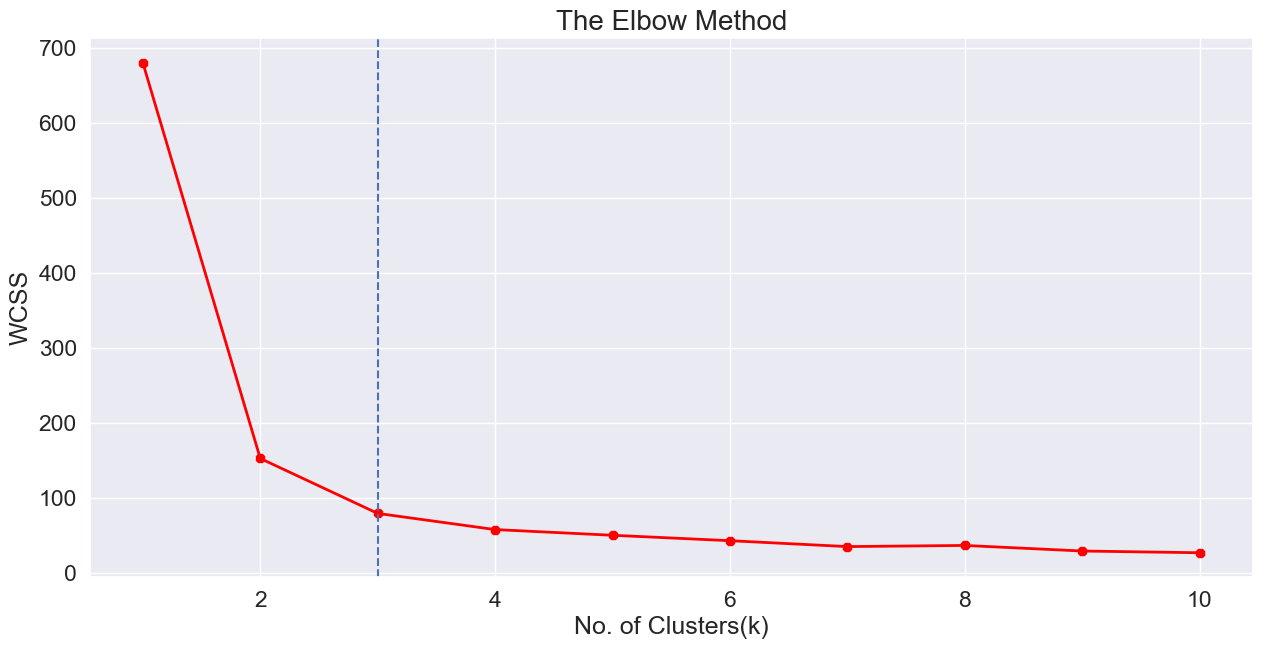

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters(k)')
plt.title('The Elbow Method', fontsize =20)
plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kms = KMeans(n_clusters=3,init='k-means++') 
kms.fit(clustering_data)
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [26]:
clusters = clustering_data.copy()

In [27]:
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
kms.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

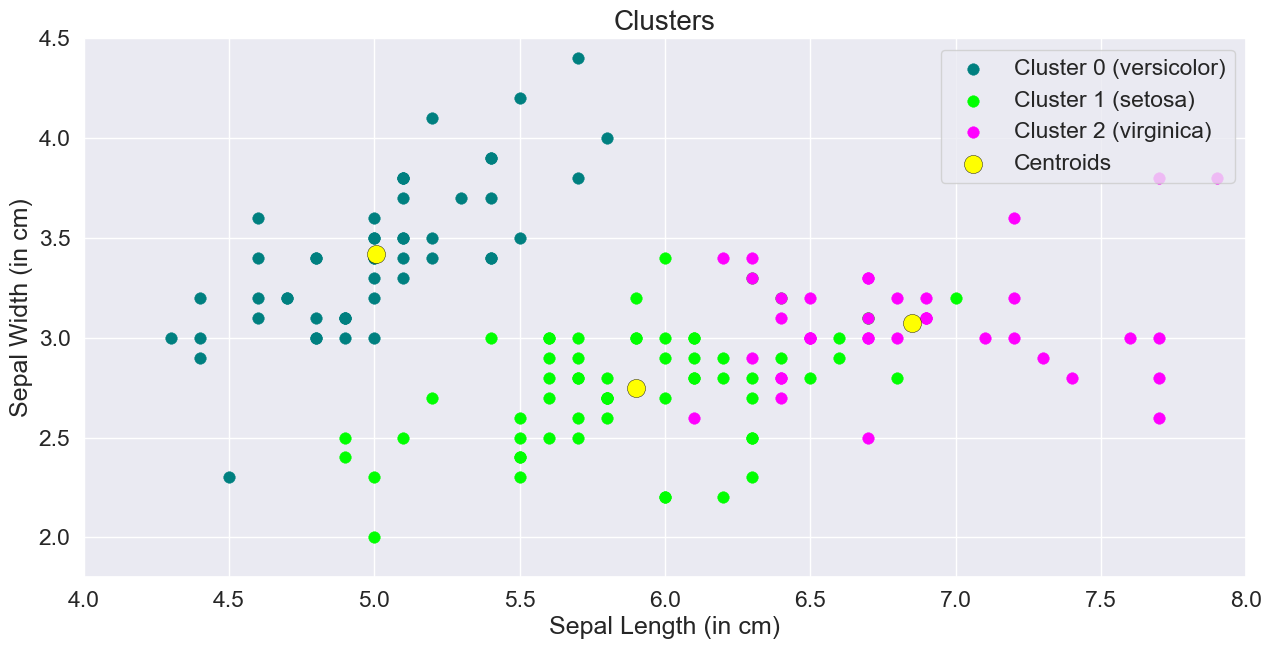

In [29]:
# Assuming 'clusters' is your DataFrame with cluster predictions
fig, ax = plt.subplots(figsize=(15, 7))

# Scatter plot for each cluster
plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
    s=70, edgecolor='teal', linewidth=0.3, c='teal', label='Cluster 0 (versicolor)'
)

plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
    s=70, edgecolor='lime', linewidth=0.3, c='lime', label='Cluster 1 (setosa)'
)

plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
    y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
    s=70, edgecolor='magenta', linewidth=0.3, c='magenta', label='Cluster 2 (virginica)'
)

# Scatter plot for cluster centroids
plt.scatter(
    x=kms.cluster_centers_[:, 0], 
    y=kms.cluster_centers_[:, 1], 
    s=170, c='yellow', label='Centroids', edgecolor='black', linewidth=0.3
)

# Legend, limits, labels, and title
plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize=20)

# Show plot
plt.show()
